In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Load Data
ml8=pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")#,nrows = 50000
ml7=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
ml6=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
ml1=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
ml5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
ml4=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
ml2=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
ml3=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
ml = pd.concat([ml1,ml2,ml3,ml4,ml5,ml6,ml7,ml8])

In [4]:
ml.shape

(2830743, 79)

In [5]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [6]:
ml.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [7]:
ml.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
ml.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

In [9]:
ml=ml.dropna(axis=0, how='any')

In [10]:
ml.shape

(2829385, 79)

In [11]:
info = ml.describe()
all_zeroes_cols = info.loc[:,(info.iloc[1:] == 0).all()]
all_zeroes_cols

,Bwd PSH Flags,Bwd URG Flags,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0,2829385.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
ml.drop(columns=all_zeroes_cols, inplace=True)
ml.shape

(2829385, 71)

In [13]:
ml[" Label"].value_counts()

BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [14]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "BENIGN"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset0 = pd.concat(samples, axis=0)
subset0.shape

(227268, 71)

In [15]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "DoS Hulk"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset1 = pd.concat(samples, axis=0)
subset1.shape

(23012, 71)

In [16]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "PortScan"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset2 = pd.concat(samples, axis=0)
subset2.shape

(15893, 71)

In [17]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "DDoS"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset3 = pd.concat(samples, axis=0)
subset3.shape

(12802, 71)

In [18]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "DoS GoldenEye"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset4 = pd.concat(samples, axis=0)
subset4.shape

(1029, 71)

In [19]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "FTP-Patator"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset5 = pd.concat(samples, axis=0)
subset5.shape

(793, 71)

In [20]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "SSH-Patator"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset6 = pd.concat(samples, axis=0)
subset6.shape

(589, 71)

In [21]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "DoS slowloris"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset7 = pd.concat(samples, axis=0)
subset7.shape

(579, 71)

In [22]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "DoS Slowhttptest"]
    sample_size = int(0.3 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset8 = pd.concat(samples, axis=0)
subset8.shape

(1649, 71)

In [23]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "Bot"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset9 = pd.concat(samples, axis=0)
subset9.shape

(196, 71)

In [24]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "Web Attack � Brute Force"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset10 = pd.concat(samples, axis=0)
subset10.shape

(150, 71)

In [25]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "Web Attack � XSS"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset11 = pd.concat(samples, axis=0)
subset11.shape

(65, 71)

In [29]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "Infiltration"]
    sample_size = int(0.1 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset12 = pd.concat(samples, axis=0)
subset12.shape

(3, 71)

In [31]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "Web Attack � Sql Injection"]
    sample_size = int(0.15 * len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset13 = pd.concat(samples, axis=0)
subset13.shape

(3, 71)

In [33]:
value_counts = ml[' Label'].value_counts()
equal_counts = value_counts[value_counts == value_counts.min()].index
# Extract 10% of the rows for each value with equal counts
samples = []
for value in equal_counts:
    value_rows = ml[ml[' Label'] == "Heartbleed"]
    sample_size = int(0.3* len(value_rows))
    sample = value_rows.sample(n=sample_size, random_state=42)
    samples.append(sample)
# Combine the extracted rows from each value to create the final 10% subset
subset14 = pd.concat(samples, axis=0)
subset14.shape

(3, 71)

In [34]:
mll=pd.concat([subset0,subset1,subset2,subset3,subset4,subset5,subset6,subset7,subset8,subset9,subset10,subset11,subset12,subset13,subset14])

In [35]:
mll[" Label"].value_counts()

BENIGN                        227268
DoS Hulk                       23012
PortScan                       15893
DDoS                           12802
DoS Slowhttptest                1649
DoS GoldenEye                   1029
FTP-Patator                      793
SSH-Patator                      589
DoS slowloris                    579
Bot                              196
Web Attack � Brute Force         150
Web Attack � XSS                  65
Infiltration                       3
Web Attack � Sql Injection         3
Heartbleed                         3
Name:  Label, dtype: int64

In [36]:
mll=mll.drop([' Fwd Header Length.1'],axis=1)

In [37]:
mll.shape

(284034, 70)

In [38]:
mll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284034 entries, 304823 to 597813
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             284034 non-null  int64  
 1    Flow Duration                284034 non-null  int64  
 2    Total Fwd Packets            284034 non-null  int64  
 3    Total Backward Packets       284034 non-null  int64  
 4   Total Length of Fwd Packets   284034 non-null  int64  
 5    Total Length of Bwd Packets  284034 non-null  int64  
 6    Fwd Packet Length Max        284034 non-null  int64  
 7    Fwd Packet Length Min        284034 non-null  int64  
 8    Fwd Packet Length Mean       284034 non-null  float64
 9    Fwd Packet Length Std        284034 non-null  float64
 10  Bwd Packet Length Max         284034 non-null  int64  
 11   Bwd Packet Length Min        284034 non-null  int64  
 12   Bwd Packet Length Mean       284034 no

In [39]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error 
)         

OneHotEncoder()

In [40]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(mll[[' Label']])
print(transformed.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
print(ohe.categories_)

[array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)]


In [42]:
mll[ohe.categories_[0]] = transformed.toarray()
print(mll.head())

         Destination Port   Flow Duration   Total Fwd Packets  \
304823                 53             168                   2   
187284                 53           30620                   4   
641090                 53           46705                   2   
61439               57629              53                   1   
199894                 53           48163                   2   

         Total Backward Packets  Total Length of Fwd Packets  \
304823                        2                           68   
187284                        2                          136   
641090                        2                           60   
61439                         1                            0   
199894                        2                           88   

         Total Length of Bwd Packets   Fwd Packet Length Max  \
304823                           100                      34   
187284                           182                      34   
641090                          

In [44]:
mll=mll.drop([" Label"],axis=1)

In [45]:
mll.shape

(284034, 84)

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
mll = mll.apply(le.fit_transform)
mll.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS
304823,24,170,1,2,65,85,34,25,3213,0,36,38,1014,0,167756,153446,583,2040,118,11,3,67,0,3,3,41,147,0,41,49,0,0,9,9,152293,137773,22,47,1228,212,201,0,0,0,0,0,0,0,0,1,1557,3213,1014,1,65,2,85,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
187284,24,10681,3,2,133,167,34,25,3213,0,77,79,2164,0,133887,142150,10656,15552,7639,11,7572,8222,9693,7685,3,40,144,0,40,48,0,0,25,9,142904,125170,22,88,1930,1809,1649,0,0,0,0,0,0,0,0,0,1994,3213,2164,3,133,2,167,0,0,3,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641090,24,16226,1,2,57,249,30,21,2552,0,118,120,3146,0,121014,125672,27118,38569,19399,9,4,74,0,4,4,1,5,0,1,1,0,0,9,19,123990,117428,18,129,3388,4483,4146,0,0,0,0,0,0,0,0,1,3699,2552,3146,1,57,2,249,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61439,19217,55,0,1,0,0,0,0,0,0,0,0,0,0,5,153702,554,0,55,61,0,0,0,0,0,0,0,0,0,0,0,0,8,7,152589,137938,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,342,531,0,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199894,24,17475,1,2,85,123,44,35,4923,0,55,57,1571,0,106528,123880,28248,39787,20592,11,3,67,0,3,3,3,14,0,3,3,0,0,9,9,122316,115676,32,66,2181,611,567,0,0,0,0,0,0,0,0,1,2423,4923,1571,1,85,2,123,0,0,1,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(mll)
scaled_features = scaler.fit_transform(mll)

In [49]:
df_feat = pd.DataFrame(scaled_features,columns=mll.columns)
df_feat.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS
0,0.000991,0.001223,0.001969,0.003226,0.009560,0.005407,0.011217,0.126263,0.147636,0.0,0.010863,0.093137,0.038016,0.0,0.927372,0.995143,0.003988,0.017138,0.001239,0.000393,0.000047,0.000781,0.000000,0.000048,0.000143,0.000743,0.001934,0.0,0.000749,0.004672,0.0,0.0,0.007092,0.006466,0.994638,0.995930,0.142857,0.012160,0.032120,0.003657,0.003520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.041892,0.147636,0.038016,0.001969,0.009560,0.003226,0.005407,0.00000,0.000000,0.002717,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000991,0.076827,0.005906,0.003226,0.019562,0.010624,0.011217,0.126263,0.147636,0.0,0.023235,0.193627,0.081131,0.0,0.740141,0.921885,0.072883,0.130651,0.080236,0.000393,0.118877,0.095836,0.127425,0.123149,0.000143,0.000725,0.001895,0.0,0.000731,0.004577,0.0,0.0,0.019701,0.006466,0.933318,0.904826,0.142857,0.022768,0.050481,0.031206,0.028881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.053650,0.147636,0.081131,0.005906,0.019562,0.003226,0.010623,0.00000,0.000000,0.008152,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000991,0.116712,0.001969,0.003226,0.008384,0.015841,0.009898,0.106061,0.117263,0.0,0.035607,0.294118,0.117947,0.0,0.668977,0.815020,0.185478,0.324014,0.203756,0.000322,0.000063,0.000863,0.000000,0.000064,0.000191,0.000018,0.000066,0.0,0.000018,0.000095,0.0,0.0,0.007092,0.013649,0.809789,0.848861,0.116883,0.033376,0.088617,0.077333,0.072615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.099524,0.117263,0.117947,0.001969,0.008384,0.003226,0.015840,0.00000,0.000000,0.002717,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.793501,0.000396,0.000000,0.001613,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000028,0.996803,0.003789,0.000000,0.000578,0.002180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.006304,0.005029,0.996571,0.997123,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.001613,0.000000,0.07771,0.117869,0.000000,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000991,0.125696,0.001969,0.003226,0.012502,0.007825,0.014517,0.176768,0.226210,0.0,0.016596,0.139706,0.058899,0.0,0.588897,0.803398,0.193207,0.334246,0.216287,0.000393,0.000047,0.000781,0.000000,0.000048,0.000143,0.000054,0.000184,0.0,0.000055,0.000286,0.0,0.0,0.007092,0.006466,0.798856,0.836196,0.207792,0.017076,0.057046,0.010540,0.009931,0.0,0.0,0

In [50]:
df_feat.shape

(284034, 84)

In [53]:
x=df_feat.iloc[:,:69]
y=df_feat.iloc[:,69:]

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284034 entries, 0 to 284033
Data columns (total 69 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             284034 non-null  float64
 1    Flow Duration                284034 non-null  float64
 2    Total Fwd Packets            284034 non-null  float64
 3    Total Backward Packets       284034 non-null  float64
 4   Total Length of Fwd Packets   284034 non-null  float64
 5    Total Length of Bwd Packets  284034 non-null  float64
 6    Fwd Packet Length Max        284034 non-null  float64
 7    Fwd Packet Length Min        284034 non-null  float64
 8    Fwd Packet Length Mean       284034 non-null  float64
 9    Fwd Packet Length Std        284034 non-null  float64
 10  Bwd Packet Length Max         284034 non-null  float64
 11   Bwd Packet Length Min        284034 non-null  float64
 12   Bwd Packet Length Mean       284034 non-nul

In [57]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284034 entries, 0 to 284033
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   BENIGN                      284034 non-null  float64
 1   Bot                         284034 non-null  float64
 2   DDoS                        284034 non-null  float64
 3   DoS GoldenEye               284034 non-null  float64
 4   DoS Hulk                    284034 non-null  float64
 5   DoS Slowhttptest            284034 non-null  float64
 6   DoS slowloris               284034 non-null  float64
 7   FTP-Patator                 284034 non-null  float64
 8   Heartbleed                  284034 non-null  float64
 9   Infiltration                284034 non-null  float64
 10  PortScan                    284034 non-null  float64
 11  SSH-Patator                 284034 non-null  float64
 12  Web Attack � Brute Force    284034 non-null  float64
 13  Web Attack � S

In [89]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# CHI SQUARE TEST FEATURE SELECTION

In [75]:
x1=df_feat.iloc[:,:69]
y1=df_feat.iloc[:,69:]

In [85]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

#selection method to select the 10 best features
k_best = SelectKBest(chi2, k='all')
X_new = k_best.fit_transform(x1, y1)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = x1.columns[selected_indices]
print(f'Selected features: {selected_features}')

Selected features: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow Packets/s', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' A

In [77]:
x1=x1.drop(["Flow Bytes/s"],axis=1)

In [79]:
x1=x1.drop([" min_seg_size_forward"],axis=1)

In [80]:
x1=x1.drop([" Fwd Header Length"],axis=1)

In [81]:
x1=x1.drop([" Bwd Header Length"],axis=1)

In [83]:
x1.shape

(284034, 65)

In [84]:
y1.shape

(284034, 15)

In [183]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Apply chi-square test to select top features

selector = SelectKBest(chi2, k='all')
# Get the selected features
X_train1 = selector.fit_transform(X_train1,y_train1)
X_test1=selector.transform(X_test1)

In [116]:
from keras.regularizers import l1
from tensorflow import keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train1.shape[1],kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3)
model.fit(X_train1, y_train1, epochs=10, batch_size=32, validation_data=(X_test1, y_test1), callbacks=[early_stopping])

Epoch 1/10
7101/7101 [==============================] - 37s 5ms/step - loss: 0.6875 - accuracy: 0.8381 - val_loss: 0.4023 - val_accuracy: 0.8948
Epoch 2/10
7101/7101 [==============================] - 11s 1ms/step - loss: 0.4772 - accuracy: 0.8774 - val_loss: 0.3714 - val_accuracy: 0.9309
Epoch 3/10
7101/7101 [==============================] - 11s 2ms/step - loss: 0.4491 - accuracy: 0.8907 - val_loss: 0.3538 - val_accuracy: 0.9277
Epoch 4/10
7101/7101 [==============================] - 11s 2ms/step - loss: 0.4367 - accuracy: 0.8931 - val_loss: 0.3305 - val_accuracy: 0.9288
Epoch 5/10
7101/7101 [==============================] - 11s 2ms/step - loss: 0.4320 - accuracy: 0.8979 - val_loss: 0.3275 - val_accuracy: 0.9350
Epoch 6/10
7101/7101 [==============================] - 11s 2ms/step - loss: 0.4376 - accuracy: 0.8956 - val_loss: 0.3087 - val_accuracy: 0.9307
Epoch 7/10
7101/7101 [==============================] - 11s 2ms/step - loss: 0.4632 - accuracy: 0.8815 - val_loss: 0.3685 - val_ac

In [118]:
score = model.evaluate(X_test1, y_test1, batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1776/1776 [==============================] - 2s 1ms/step - loss: 0.3263 - accuracy: 0.9202
Test loss: 0.32633650302886963
Test accuracy: 0.9201682806015015


In [119]:
y_pred1=model.predict(X_test1)
y_pred1

1776/1776 [==============================] - 2s 1ms/step


array([[9.9798572e-01, 4.0870550e-04, 3.4846660e-16, ..., 1.7578797e-06,
        2.4375678e-22, 5.5857630e-10],
       [9.4747627e-01, 1.1291923e-03, 1.8039586e-06, ..., 2.9064139e-04,
        1.3000342e-10, 8.5973306e-06],
       [7.8530020e-01, 4.9201748e-04, 1.4408172e-02, ..., 3.9348300e-04,
        1.5488713e-07, 2.7462036e-05],
       ...,
       [8.8860172e-01, 8.7282847e-04, 4.1590410e-04, ..., 4.6315117e-04,
        1.6178756e-08, 2.7154034e-05],
       [9.6147114e-01, 4.7758935e-04, 6.2353702e-17, ..., 5.1471416e-06,
        1.1836642e-21, 1.0041551e-09],
       [9.9781585e-01, 4.4345207e-04, 1.1069031e-14, ..., 3.1139589e-06,
        1.1561951e-20, 1.9503210e-09]], dtype=float32)

In [130]:
y_test1=y_test1.values
y_test1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [122]:
y_test1=np.round(y_test1)
y_pred1=np.round(y_pred1)

In [131]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# assume that y_true and y_pred are numpy arrays containing the true and predicted labels, respectively.
# each row in y_true and y_pred represents the true and predicted labels for a single sample.

# convert the labels to binary form
mlb = MultiLabelBinarizer()
y_true_binary = mlb.fit_transform(y_test1)
y_pred_binary = mlb.transform(y_pred1)

# calculate precision, recall, and f1-score for each label separately
precision = precision_score(y_true_binary, y_pred_binary, average='macro')
recall = recall_score(y_true_binary, y_pred_binary, average='macro')
f1_score = f1_score(y_true_binary, y_pred_binary, average='macro')

# print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

Precision: 1.0
Recall: 0.9988645765486648
F1 score: 0.9994316429484074


In [234]:
from sklearn.metrics import multilabel_confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively

# generate the confusion matrix
cm = multilabel_confusion_matrix(y_test1, y_pred1)
# print the confusion matrix for each label
for i in range(len(cm)):
    print(f"Confusion matrix for label {i}:\n{cm[i]}")

Confusion matrix for label 0:
[[ 7102  4301]
 [  121 45283]]
Confusion matrix for label 1:
[[56773     0]
 [   34     0]]
Confusion matrix for label 2:
[[54151    60]
 [   63  2533]]
Confusion matrix for label 3:
[[56595     0]
 [  212     0]]
Confusion matrix for label 4:
[[52133    84]
 [ 1817  2773]]
Confusion matrix for label 5:
[[56463     0]
 [  344     0]]
Confusion matrix for label 6:
[[56678     0]
 [  129     0]]
Confusion matrix for label 7:
[[56630     0]
 [  177     0]]
Confusion matrix for label 8:
[[56807     0]
 [    0     0]]
Confusion matrix for label 9:
[[56806     0]
 [    1     0]]
Confusion matrix for label 10:
[[53617    18]
 [ 1546  1626]]
Confusion matrix for label 11:
[[56694     0]
 [  113     0]]
Confusion matrix for label 12:
[[56789     0]
 [   18     0]]
Confusion matrix for label 13:
[[56807     0]
 [    0     0]]
Confusion matrix for label 14:
[[56790     0]
 [   17     0]]


# CORRELATION FEATURE SELECTION

In [161]:
corr_matrix=df_feat.corr()
corr_matrix

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS
Destination Port,1.000000,-0.251848,-0.088871,-0.076148,0.003407,-0.203015,0.015307,-0.213724,-0.180817,-0.068289,-0.220110,-0.242761,-0.252456,-0.202594,-0.023386,0.269112,-0.268771,-0.236913,-0.259051,-0.120709,-0.215013,-0.198061,-0.199346,-0.209739,-0.048654,-0.161224,-0.150359,-0.134875,-0.156586,-0.083511,0.221179,-0.001093,-0.124955,-0.119023,0.261237,0.043578,-0.253579,-0.152684,-0.176505,-0.159746,-0.157570,-0.039494,0.221179,-0.006512,-0.176728,0.506958,0.478569,-0.001093,-0.006122,0.038224,-0.179813,-0.180817,-0.252456,-0.088871,0.003407,-0.076148,-0.203015,-0.090023,0.206749,-0.081510,-0.020766,-0.113527,-0.097403,-0.116502,-0.102919,-0.140745,-0.073831,-0.141034,-0.141334,0.145400,0.013279,-0.090003,-0.024980,-0.123007,-0.031658,-0.018724,-0.022074,-0.001316,-0.001316,0.003697,-0.019009,-0.009523,-0.001346,-0.006268
Flow Duration,-0.251848,1.000000,0.346553,0.287376,0.442050,0.624604,0.449739,-0.251945,0.410184,0.560103,0.632462,-0.251866,0.573711,0.611295,-0.549684,-0.958525,0.947039,0.941124,0.980441,0.056358,0.944704,0.927354,0.882194,0.939164,0.291014,0.812438,0.801513,0.764318,0.811649,0.293566,-0.014097,-0.007988,0.467187,0.430550,-0.957413,-0.540739,-0.275823,0.646604,0.594824,0.627473,0.625620,0.116918,-0.014097,0.016481,0.342945,-0.072490,-0.151471,-0.007988,0.016199,-0.144584,0.579865,0.410184,0.573711,0.346553,0.442050,0.287376,0.624604,0.360322,0.150622,0.292268,-0.132998,0.589269,0.463398,0.611317,0.554924,0.823309,0.491502,0.833590,0.802657,-0.191507,-0.006762,0.163576,0.075010,0.264145,0.101503,0.055307,0.009387,0.007625,0.005411,-0.198259,0.010362,0.016647,0.002626,0.013381
Total Fwd Packets,-0.088871,0.346553,1.000000,0.951981,0.481758,0.482290,0.272043,-0.140372,0.146387,0.240913,0.311336,-0.134375,0.291867,0.255204,-0.055743,-0.199345,0.185016,0.261273,0.297574,-0.083441,0.344842,0.230682,0.291453,0.320444,-0.027113,0.364623,0.261240,0.327094,0.341980,-0.001955,-0.006628,-0.002106,0.904898,0.878894,-0.202455,-0.099826,-0.146331,0.305625,0.310213,0.277368,0.276414,-0.018552,-0.006628,0.005412,0.252660,-0.089796,-0.083575,-0.002106,0.005315,-0.054694,0.297423,0.146387,0.291867,1.000000,0.481758,0.951981,0.482290,0.260121,0.069765,0.777412,-0.039625,0.372867,0.420654,0.411561,0.269746,0.260885,0.304044,0.267773,0.240330,0.046483,-0.004143,-0.014254,0.001321,-0.004996,0.000675,0.001967,-0.000131,0.093795,0.025052,-0.067101,0.015458,-0.000182,-0.000112,-0.002268
Total Backward Packets,-0.076148,0.287376,0.951981,1.000000,0.435329,0.484468,0.239291,-0.109168,0.116008,0.198138,0.303429,-0.098780,0.293087,0.238081,-0.013912,-0.150937,0.137934,0.207582,0.245962,-0.070273,0.275857,0.168221,0.22

<AxesSubplot:>

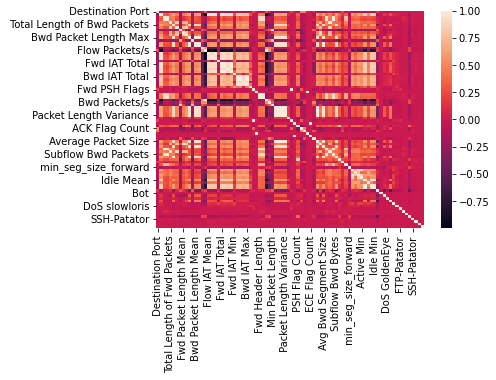

In [162]:
sns.heatmap(df_feat.corr())

In [173]:
import numpy as np
mask = np.triu(np.abs(corr_matrix) > 0.8, k=1)

In [174]:
high_corr_indices = np.where(mask)
high_corr_names = [(df_feat.columns[i], df_feat.columns[j]) for i, j in zip(*high_corr_indices)]

In [177]:
unique_features = {feature for feature, value in high_corr_names}
unique_features

{' Active Max',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Bwd Header Length',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Flow Duration',
 ' Flow IAT Max',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow Packets/s',
 ' Fwd Header Length',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Std',
 ' Fwd URG Flags',
 ' Idle Max',
 ' Max Packet Length',
 ' PSH Flag Count',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' RST Flag Count',
 ' Total Backward Packets',
 ' Total Fwd Packets',
 ' Total Length of Bwd Packets',
 'Active Mean',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets',
 'Total Length of Fwd Packets'}

In [186]:
x3=df_feat[[' Active Max',' Average Packet Size',' Avg Bwd Segment Size',' Bwd Header Length',' Bwd IAT Mean',' Bwd IAT Std',' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',' Flow Duration',' Flow IAT Max',' Flow IAT Mean',' Flow IAT Std',' Flow Packets/s',' Fwd Header Length',' Fwd IAT Max',
 ' Fwd IAT Mean',' Fwd IAT Std',' Fwd Packet Length Max',' Fwd Packet Length Mean',' Fwd Packet Length Min',' Fwd Packet Length Std',
 ' Fwd URG Flags',' Idle Max',' Max Packet Length',' PSH Flag Count',' Packet Length Mean',' Packet Length Std',' Packet Length Variance',' RST Flag Count',
 ' Total Backward Packets',' Total Fwd Packets',' Total Length of Bwd Packets','Active Mean','Bwd IAT Total','Bwd Packet Length Max','Fwd IAT Total','Fwd PSH Flags','Fwd Packets/s','Idle Mean','Subflow Fwd Packets','Total Length of Fwd Packets']]
y3=df_feat.iloc[:,69:]

In [187]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [188]:
from keras.regularizers import l1
from tensorflow import keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train3.shape[1],kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [189]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3)
model.fit(X_train3, y_train3, epochs=10, batch_size=32, validation_data=(X_test3, y_test3), callbacks=[early_stopping])

Epoch 1/10
7101/7101 [==============================] - 60s 8ms/step - loss: 0.7293 - accuracy: 0.8368 - val_loss: 0.4492 - val_accuracy: 0.9025
Epoch 2/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.5126 - accuracy: 0.8678 - val_loss: 0.3980 - val_accuracy: 0.9150
Epoch 3/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.4821 - accuracy: 0.8785 - val_loss: 0.3819 - val_accuracy: 0.9210
Epoch 4/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.4711 - accuracy: 0.8810 - val_loss: 0.3772 - val_accuracy: 0.9160
Epoch 5/10
7101/7101 [==============================] - 14s 2ms/step - loss: 0.4661 - accuracy: 0.8830 - val_loss: 0.3778 - val_accuracy: 0.9133
Epoch 6/10
7101/7101 [==============================] - 14s 2ms/step - loss: 0.4774 - accuracy: 0.8800 - val_loss: 0.3617 - val_accuracy: 0.9165
Epoch 7/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.5174 - accuracy: 0.8641 - val_loss: 0.3823 - val_ac

In [190]:
score = model.evaluate(X_test3, y_test3, batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1776/1776 [==============================] - 3s 2ms/step - loss: 0.3970 - accuracy: 0.8623
Test loss: 0.3970194160938263
Test accuracy: 0.8623409271240234


In [191]:
y_pred3=model.predict(X_test3)
y_pred3

1776/1776 [==============================] - 3s 2ms/step


array([[9.5957452e-01, 3.3529702e-04, 2.0495790e-15, ..., 3.9271225e-07,
        1.3572028e-15, 2.7083628e-29],
       [8.8778299e-01, 1.3601239e-03, 5.8360901e-03, ..., 1.0975183e-03,
        1.2586733e-05, 5.5410362e-07],
       [9.3222803e-01, 1.0804075e-03, 2.4432080e-07, ..., 7.4113050e-05,
        4.5500489e-11, 9.2451539e-11],
       ...,
       [9.1467434e-01, 1.2390807e-03, 1.1214596e-04, ..., 3.8092025e-04,
        1.0727602e-07, 1.1304006e-08],
       [9.4405931e-01, 6.6646404e-05, 3.2158136e-23, ..., 1.6851056e-09,
        1.7507681e-18, 0.0000000e+00],
       [9.3216658e-01, 1.0814894e-03, 2.5275784e-07, ..., 7.4807016e-05,
        4.7398960e-11, 9.5527815e-11]], dtype=float32)

In [192]:
y_test3=y_test3.values
y_test3

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [193]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# assume that y_true and y_pred are numpy arrays containing the true and predicted labels, respectively.
# each row in y_true and y_pred represents the true and predicted labels for a single sample.

# convert the labels to binary form
mlb = MultiLabelBinarizer()
y_true_binary = mlb.fit_transform(y_test3)
y_pred_binary = mlb.transform(y_pred3)

# calculate precision, recall, and f1-score for each label separately
precision = precision_score(y_true_binary, y_pred_binary, average='macro')
recall = recall_score(y_true_binary, y_pred_binary, average='macro')
f1_score = f1_score(y_true_binary, y_pred_binary, average='macro')

# print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

Precision: 0.5
Recall: 0.043066875561110426
F1 score: 0.0793030794165316


In [207]:
y_test3=np.round(y_test3)
y_pred3=np.round(y_pred3)

In [208]:
from sklearn.metrics import multilabel_confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively

# generate the confusion matrix
cm = multilabel_confusion_matrix(y_test3,y_pred3)

# print the confusion matrix for each label
for i in range(len(cm)):
    print(f"Confusion matrix for label {i}:\n{cm[i]}")

Confusion matrix for label 0:
[[ 7200  4203]
 [ 1165 44239]]
Confusion matrix for label 1:
[[56773     0]
 [   34     0]]
Confusion matrix for label 2:
[[54165    46]
 [ 1952   644]]
Confusion matrix for label 3:
[[56595     0]
 [  212     0]]
Confusion matrix for label 4:
[[52217     0]
 [ 1832  2758]]
Confusion matrix for label 5:
[[56463     0]
 [  344     0]]
Confusion matrix for label 6:
[[56678     0]
 [  129     0]]
Confusion matrix for label 7:
[[56630     0]
 [  177     0]]
Confusion matrix for label 8:
[[56807     0]
 [    0     0]]
Confusion matrix for label 9:
[[56806     0]
 [    1     0]]
Confusion matrix for label 10:
[[53635     0]
 [ 3172     0]]
Confusion matrix for label 11:
[[56694     0]
 [  113     0]]
Confusion matrix for label 12:
[[56789     0]
 [   18     0]]
Confusion matrix for label 13:
[[56807     0]
 [    0     0]]
Confusion matrix for label 14:
[[56790     0]
 [   17     0]]


# DNN FOR WHOLE DATASET

In [200]:
x4=df_feat.iloc[:,:69]
y4=df_feat.iloc[:,69:]

In [201]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4,y4, test_size=0.2,random_state=42)

In [202]:
from keras.regularizers import l1
from tensorflow import keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train4.shape[1],kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [203]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3)
model.fit(X_train4, y_train4, epochs=10, batch_size=32, validation_data=(X_test4, y_test4), callbacks=[early_stopping])

Epoch 1/10
7101/7101 [==============================] - 77s 11ms/step - loss: 0.6807 - accuracy: 0.8432 - val_loss: 0.3966 - val_accuracy: 0.8668
Epoch 2/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.4655 - accuracy: 0.8738 - val_loss: 0.3467 - val_accuracy: 0.8975
Epoch 3/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.4497 - accuracy: 0.8827 - val_loss: 0.3635 - val_accuracy: 0.9197
Epoch 4/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.4502 - accuracy: 0.8802 - val_loss: 0.3502 - val_accuracy: 0.9002
Epoch 5/10
7101/7101 [==============================] - 13s 2ms/step - loss: 0.4494 - accuracy: 0.8761 - val_loss: 0.3625 - val_accuracy: 0.8960


In [204]:
score = model.evaluate(X_test4, y_test4, batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1776/1776 [==============================] - 2s 1ms/step - loss: 0.3625 - accuracy: 0.8960
Test loss: 0.36250993609428406
Test accuracy: 0.8959635496139526


In [205]:
y_pred4=model.predict(X_test4)
y_pred4

1776/1776 [==============================] - 2s 1ms/step


array([[9.9858284e-01, 8.2378479e-05, 3.0654008e-09, ..., 5.7894761e-07,
        6.8866970e-14, 1.2189933e-08],
       [9.7937953e-01, 3.4440344e-04, 9.0142782e-04, ..., 7.2687799e-05,
        1.3385250e-08, 6.2413615e-06],
       [3.3561754e-01, 7.0460778e-06, 3.2732889e-01, ..., 3.3779655e-05,
        4.7569912e-08, 3.4561708e-06],
       ...,
       [9.5268905e-01, 2.8686909e-04, 6.1743022e-03, ..., 9.9084573e-05,
        3.7084440e-08, 8.8203615e-06],
       [9.9749243e-01, 7.7854253e-05, 2.4206469e-07, ..., 1.3542847e-06,
        8.9054122e-13, 3.2541241e-08],
       [9.9364072e-01, 4.1705248e-04, 7.5935822e-07, ..., 1.6727245e-05,
        1.7918375e-10, 1.1442679e-06]], dtype=float32)

In [210]:
y_test4=y_test4.values
y_test4

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [211]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# assume that y_true and y_pred are numpy arrays containing the true and predicted labels, respectively.
# each row in y_true and y_pred represents the true and predicted labels for a single sample.

# convert the labels to binary form
mlb = MultiLabelBinarizer()
y_true_binary = mlb.fit_transform(y_test4)
y_pred_binary = mlb.transform(y_pred4)

# calculate precision, recall, and f1-score for each label separately
precision = precision_score(y_true_binary, y_pred_binary, average='macro')
recall = recall_score(y_true_binary, y_pred_binary, average='macro')
f1_score = f1_score(y_true_binary, y_pred_binary, average='macro')

# print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

Precision: 0.5
Recall: 0.026590032918478355
F1 score: 0.05049475162131443


In [212]:
y_test4=np.round(y_test4)
y_pred4=np.round(y_pred4)

In [213]:
from sklearn.metrics import multilabel_confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively

# generate the confusion matrix
cm = multilabel_confusion_matrix(y_test4,y_pred4)

# print the confusion matrix for each label
for i in range(len(cm)):
    print(f"Confusion matrix for label {i}:\n{cm[i]}")

Confusion matrix for label 0:
[[10124  1279]
 [ 1037 44367]]
Confusion matrix for label 1:
[[56773     0]
 [   34     0]]
Confusion matrix for label 2:
[[54211     0]
 [ 2596     0]]
Confusion matrix for label 3:
[[56595     0]
 [  212     0]]
Confusion matrix for label 4:
[[51752   465]
 [ 1817  2773]]
Confusion matrix for label 5:
[[56463     0]
 [  344     0]]
Confusion matrix for label 6:
[[56678     0]
 [  129     0]]
Confusion matrix for label 7:
[[56630     0]
 [  177     0]]
Confusion matrix for label 8:
[[56807     0]
 [    0     0]]
Confusion matrix for label 9:
[[56806     0]
 [    1     0]]
Confusion matrix for label 10:
[[53032   603]
 [  109  3063]]
Confusion matrix for label 11:
[[56694     0]
 [  113     0]]
Confusion matrix for label 12:
[[56789     0]
 [   18     0]]
Confusion matrix for label 13:
[[56807     0]
 [    0     0]]
Confusion matrix for label 14:
[[56790     0]
 [   17     0]]
